In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools 

mariter = itertools.cycle(('o','s','^','p'))
# marker = next(mariter) # paste this to cycle through differt marker styles if needed

plt.rcParams['figure.figsize'] = [9,6] # size of the plot; use 3t:2t ratio; recommended 9:6 or 15:10
plt.rcParams['figure.dpi'] = 300 # quality of the plot; use 300 for debugging, 1000+ for quality
plt.rcParams['axes.titlesize'] = 20 # fontsize of the title
plt.rcParams['axes.labelsize'] = 16 # fontsize of the x- and y-axis labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the x-axis
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the y-axis
plt.rcParams['legend.markerscale'] = 1 # legend marker size
plt.rcParams['lines.markersize'] = 1 # marker size
plt.rcParams['lines.linestyle'] = '--' # line in between points; use 'None' or '--' (dashed)
plt.rcParams['lines.linewidth'] = 2 # width of line between points, if any
plt.rcParams['axes.titlepad'] = 15 # distance between plot area and title
plt.rcParams['axes.labelpad'] = 10 # distance between plot area and title

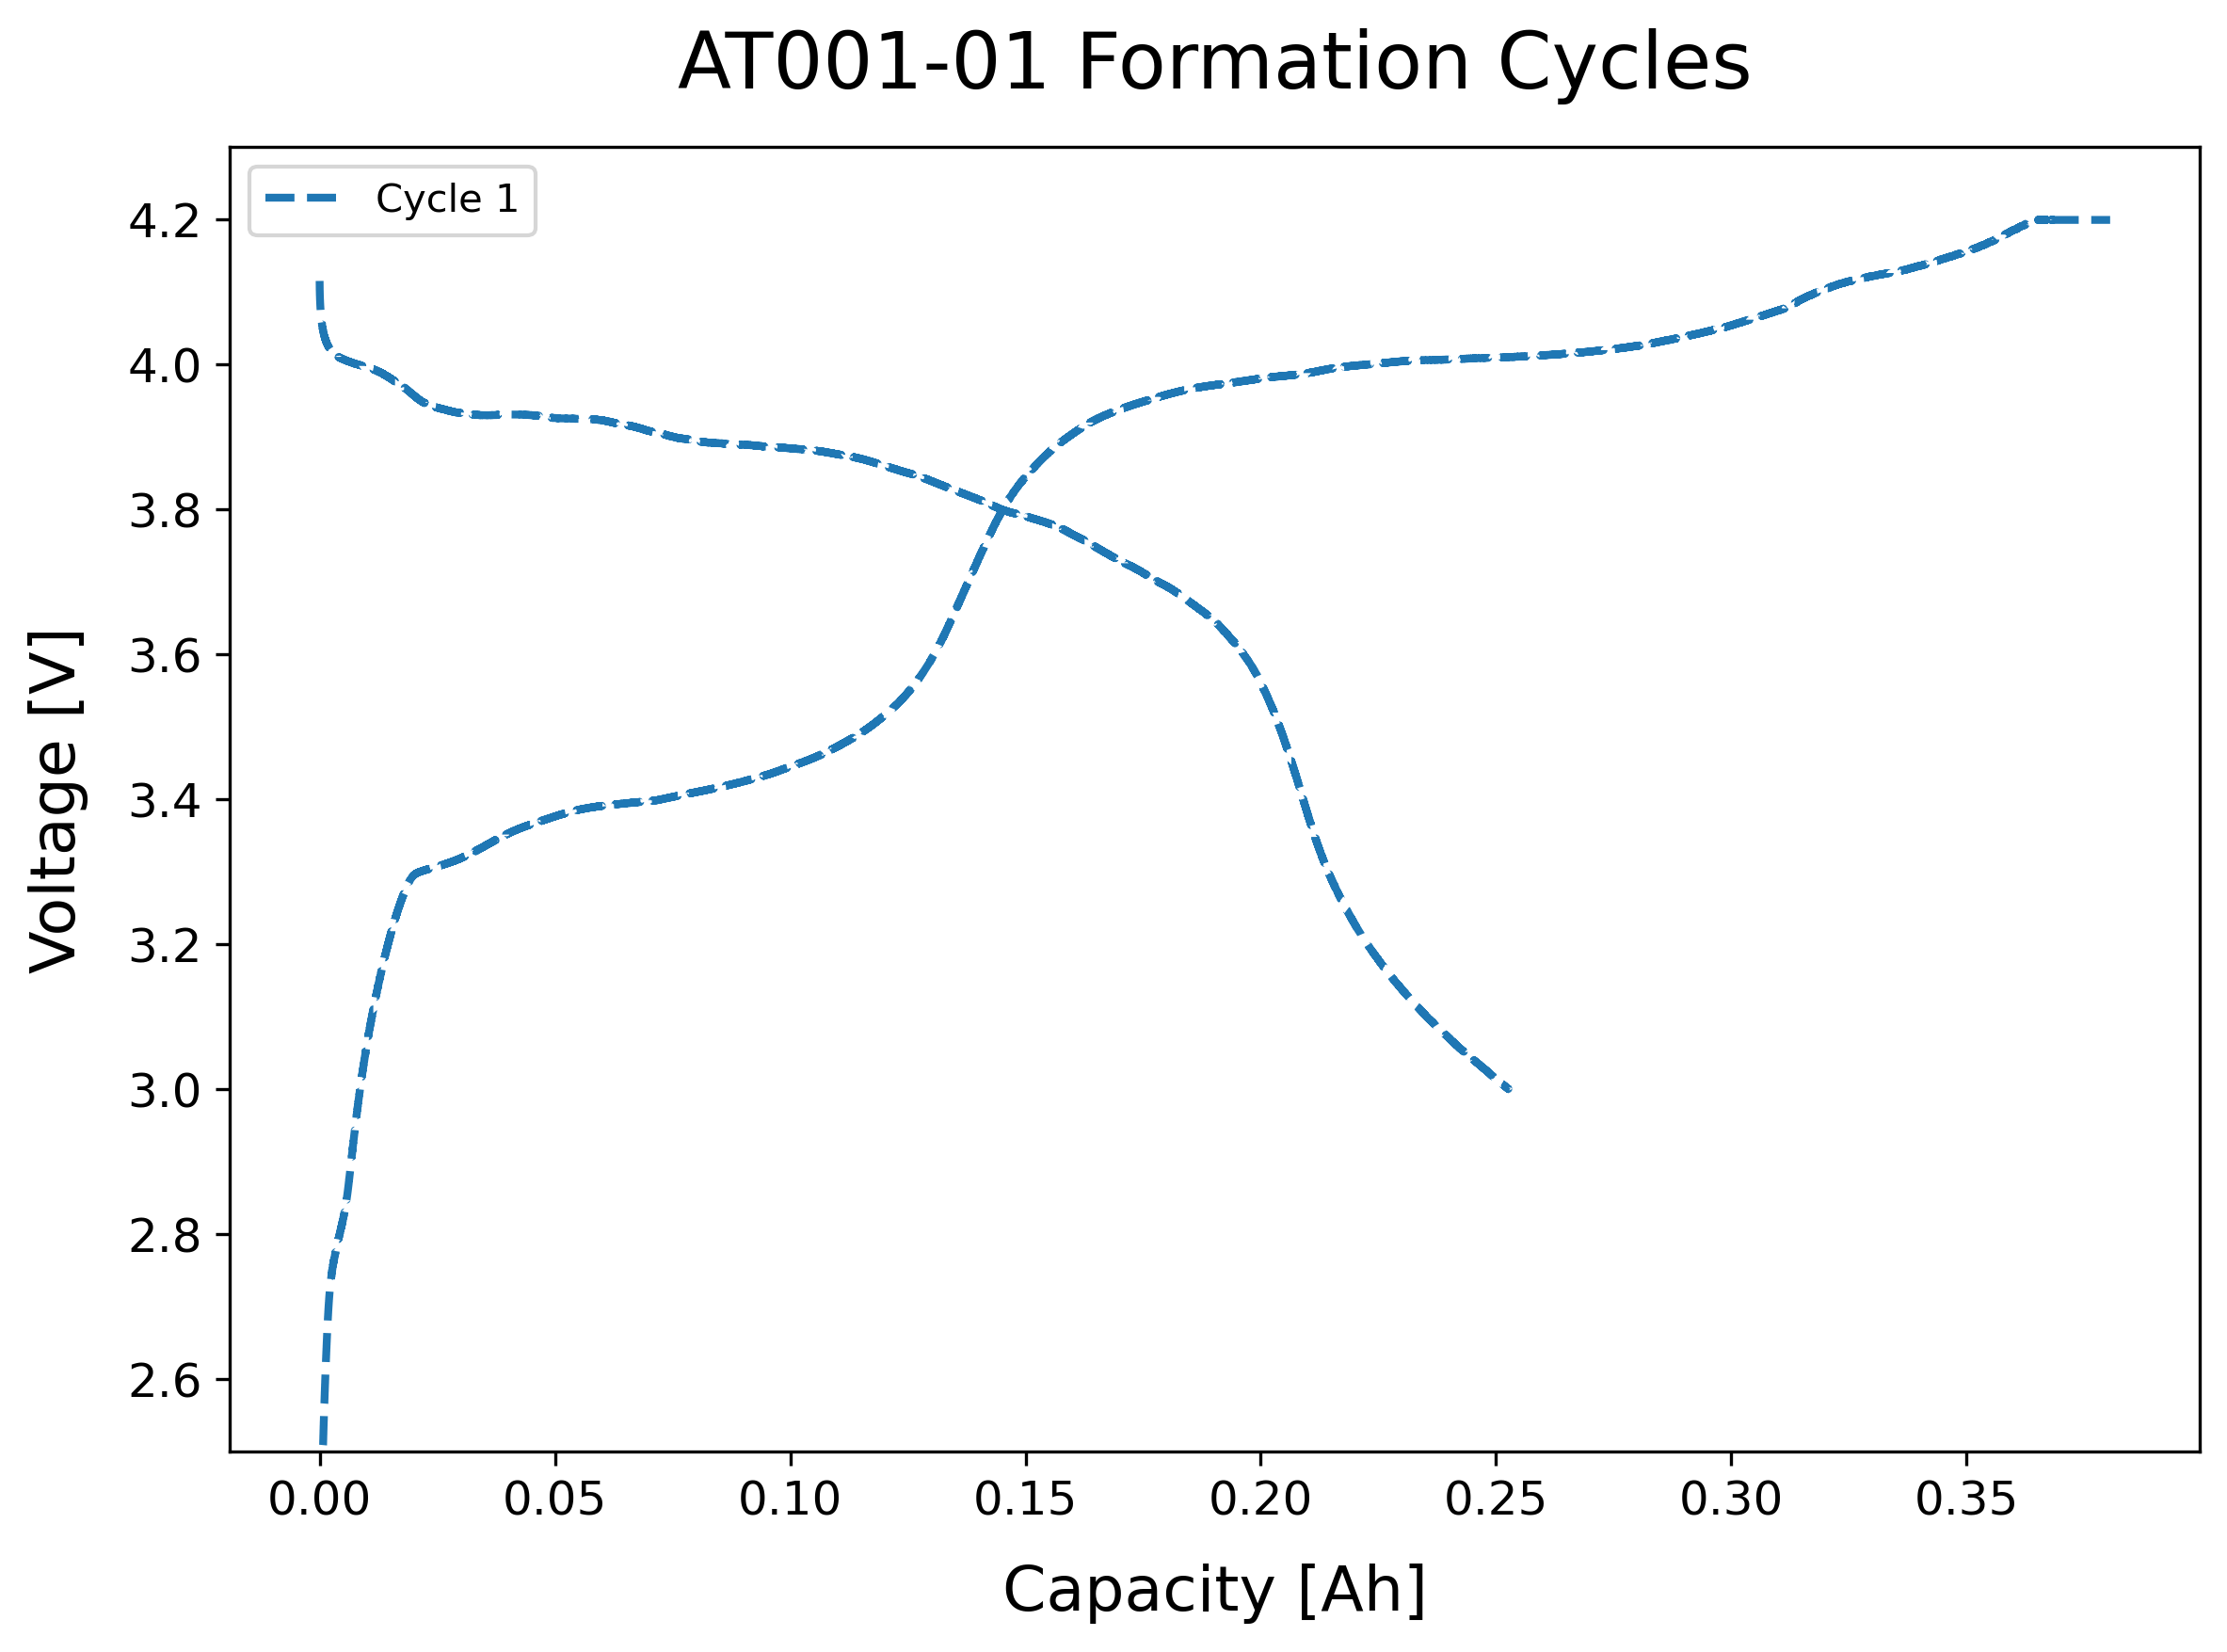

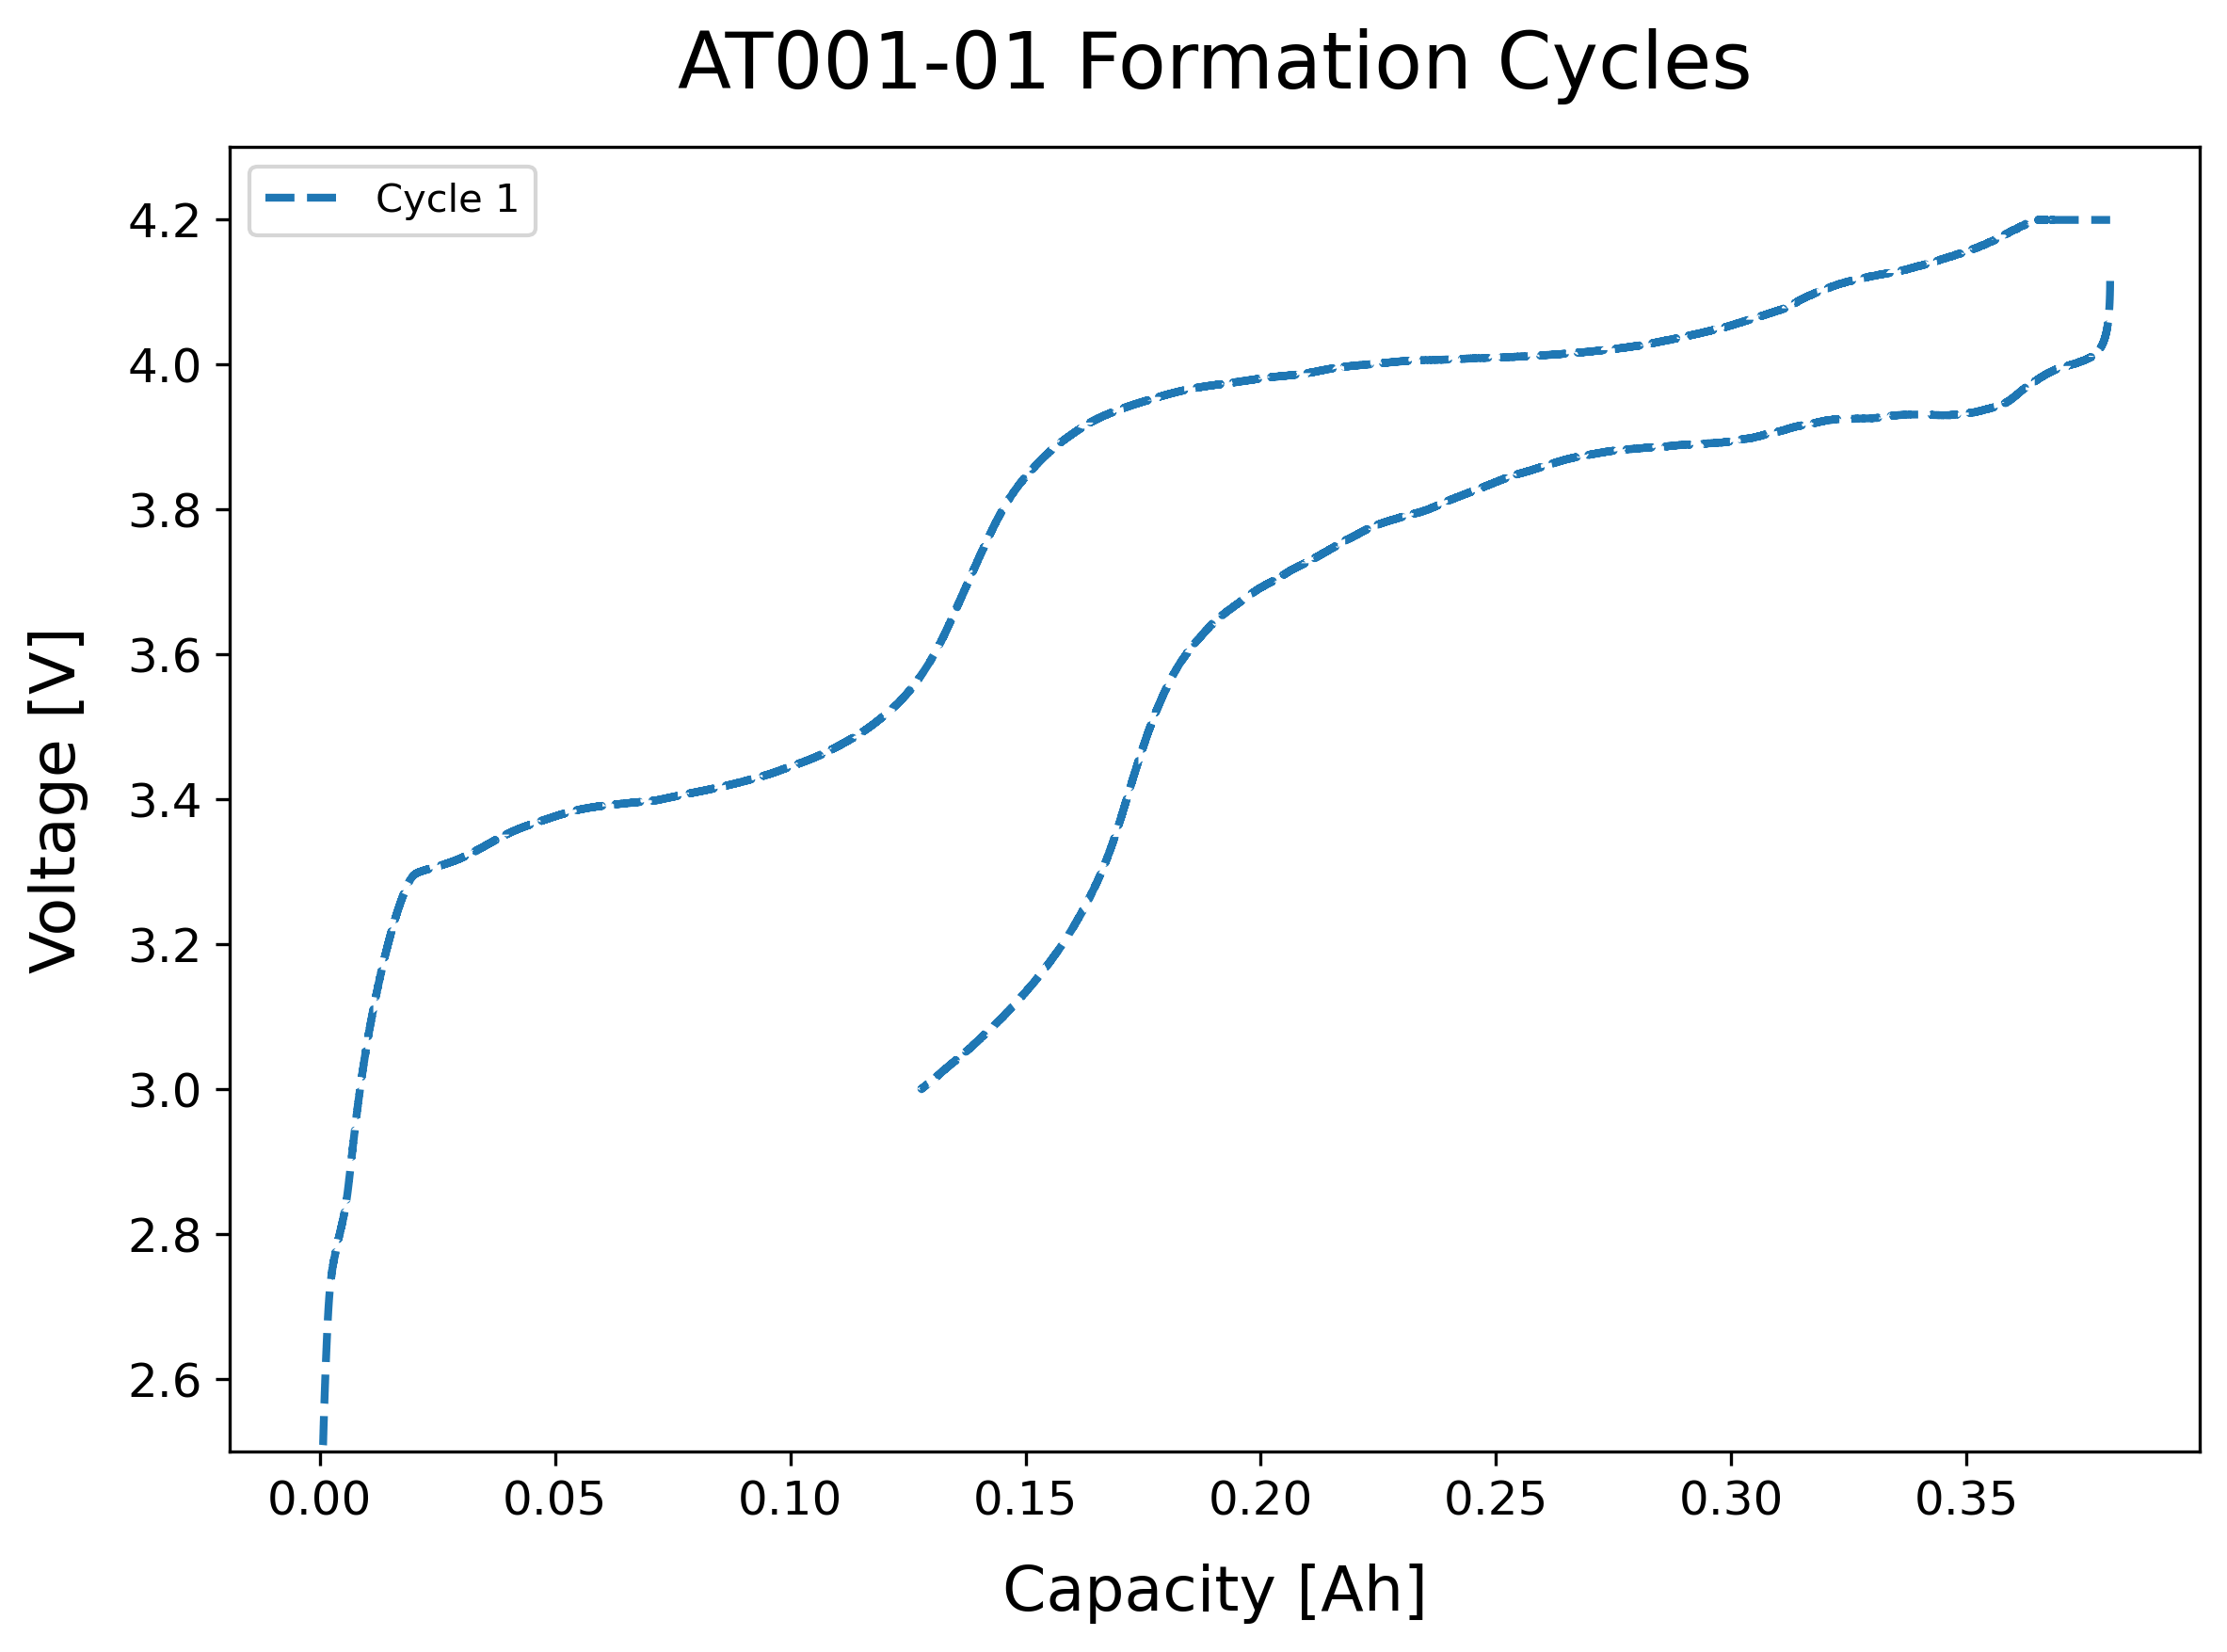

In [9]:
append_to_file = "/home/jovyan/"

file1 = append_to_file + "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/ATPC001-01-02_formation/21_1_1_145.csv"

# all_files = dict(

#     file1 = dict(
#         exp_path = "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/ATPC001-01-02_formation/21_1_1_145.csv",
#         exp_name = 'ATPC001_01',
#     ),
    
#     file2 = dict(
#         exp_path = "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/ATPC001-01-02_formation/21_1_2_146.csv",
#         exp_name = 'ATPC001_02'
#     ),

# )

# for file in list(all_files.keys())
#     df = pd.read_csv(append_to_file + all_files[file]["exp_path"])

#     if df[]

df1 = pd.read_csv(file1)
# df2 = pd.read_csv(file2)

# Nominal Capacity

voltage_cy1 = df1[df1["Current(A)"]>0]["Voltage(V)"]
# voltage_cy2 = df2[df2["Current(A)"]>0]["Voltage(V)"]
capacity_cy1 = df1[df1["Current(A)"]>0]["Capacity(Ah)"]
# capacity_cy2 = df2[df2["Current(A)"]>0]["Capacity(Ah)"]

dch_voltage_cy1 = df1[df1["Current(A)"]<0]["Voltage(V)"]
# dch_voltage_cy2 = df2[df2["Current(A)"]<0]["Voltage(V)"]
dch_capacity_cy1 = df1[df1["Current(A)"]<0]["Capacity(Ah)"]
# dch_capacity_cy2 = df2[df2["Current(A)"]<0]["Capacity(Ah)"]

a, = plt.plot(capacity_cy1,voltage_cy1, label='Cycle 1')
plt.plot(dch_capacity_cy1, dch_voltage_cy1, color=a.get_color())
# b, = plt.plot(capacity_cy2,voltage_cy2, label='Cycle 2')
# plt.plot(dch_capacity_cy2,dch_voltage_cy2, color=b.get_color())

plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.ylim([2.5, 4.3])
plt.title('AT001-01 Formation Cycles')
plt.legend()
plt.savefig(append_to_file + "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/ATPC001-01-02_formation/" +  "formation_v1.png")
plt.show()

dchcap1 = capacity_cy1.iat[-1] - df1[df1["Current(A)"]<0]["Capacity(Ah)"]
# dchcap2 = capacity_cy2.iat[-1] - df2[df2["Current(A)"]<0]["Capacity(Ah)"]

a, = plt.plot(capacity_cy1,voltage_cy1, label='Cycle 1')
plt.plot(dchcap1, dch_voltage_cy1, color=a.get_color())
# b, = plt.plot(capacity_cy2,voltage_cy2, label='Cycle 2')
# plt.plot(dchcap2,dch_voltage_cy2, color=b.get_color())

plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.ylim([2.5, 4.3])
plt.title('AT001-01 Formation Cycles')
plt.legend()
plt.savefig(append_to_file + "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/ATPC001-01-02_formation/" +  "formation_v2.png")
plt.show()

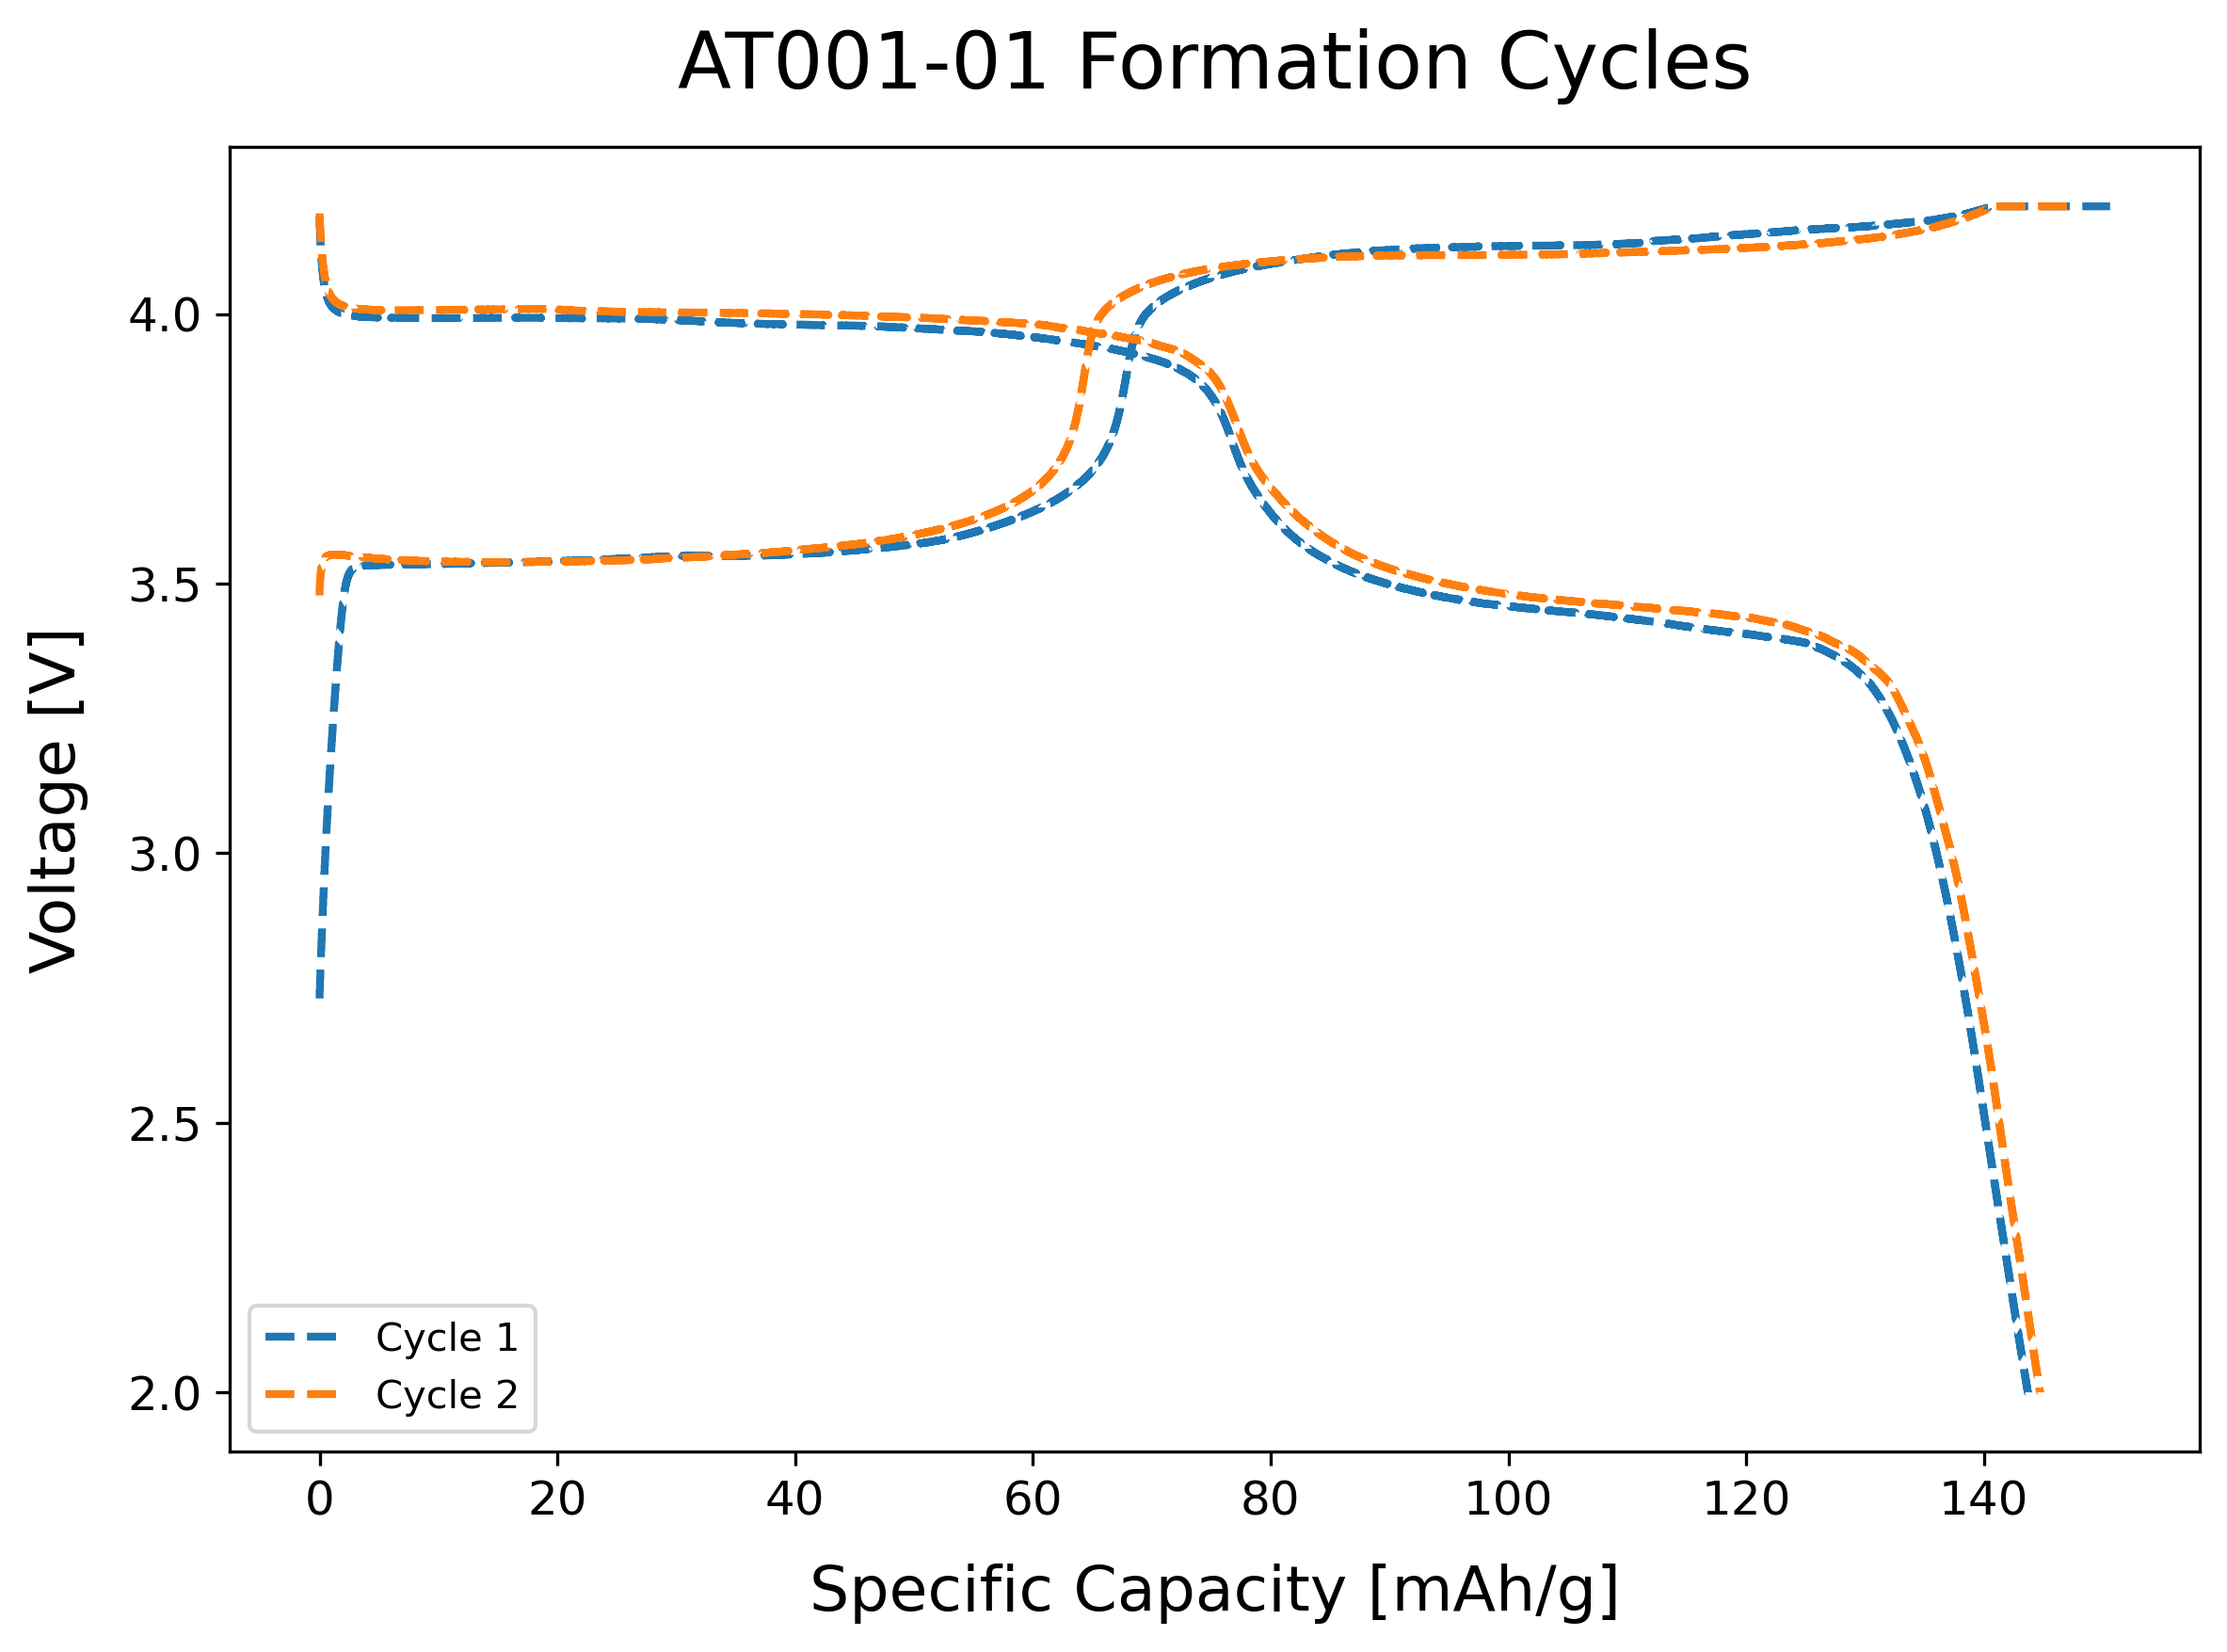

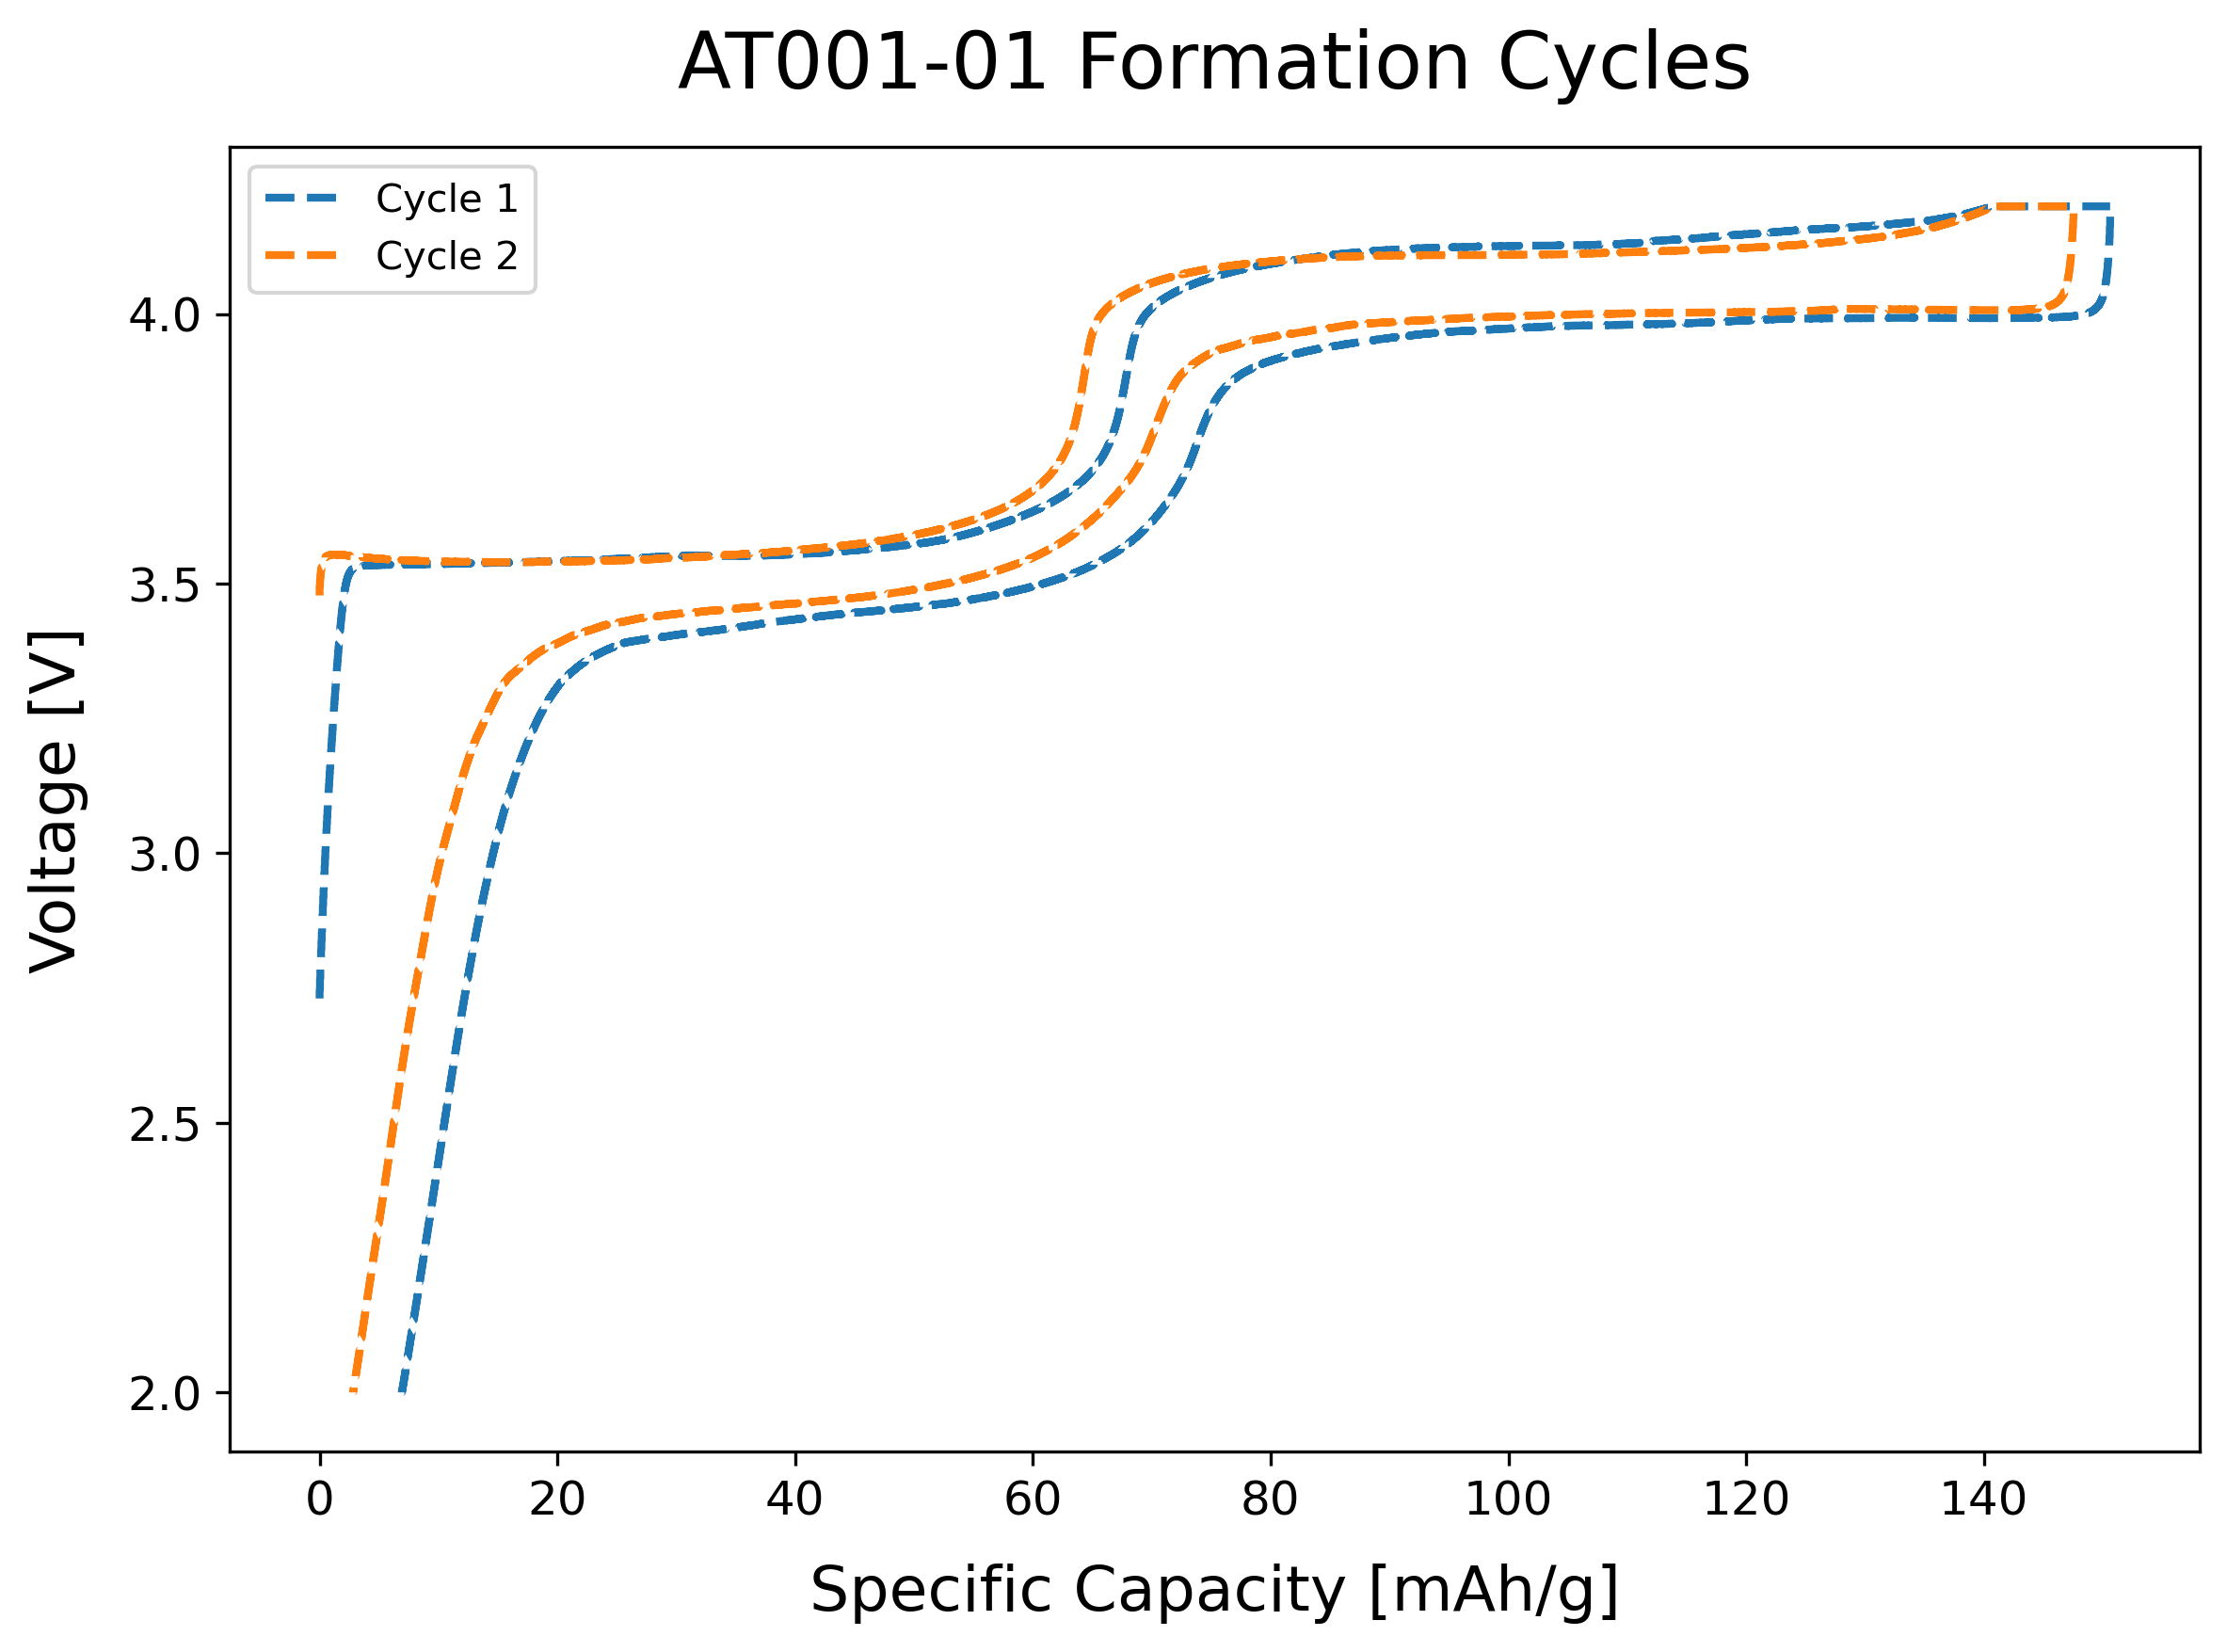

In [3]:
# Specific Capacity

spec_cap_cy1 = df1[df1["Current(A)"]>0]["Capacity(Ah)"]*1e6/mass
spec_cap_cy2 = df2[df2["Current(A)"]>0]["Capacity(Ah)"]*1e6/mass
dch_spec_cap_cy1 = df1[df1["Current(A)"]<0]["Capacity(Ah)"]*1e6/mass
dch_spec_cap_cy2 = df2[df2["Current(A)"]<0]["Capacity(Ah)"]*1e6/mass

a, = plt.plot(spec_cap_cy1,voltage_cy1, label='Cycle 1')
plt.plot(dch_spec_cap_cy1, dch_voltage_cy1, color=a.get_color())
b, = plt.plot(spec_cap_cy2,voltage_cy2, label='Cycle 2')
plt.plot(dch_spec_cap_cy2,dch_voltage_cy2, color=b.get_color())

plt.xlabel('Specific Capacity [mAh/g]')
plt.ylabel('Voltage [V]')
plt.title('AT001-01 Formation Cycles')
plt.legend()
plt.savefig(append_to_file + "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/" +  "formation_v3.png")
plt.show()

dchcap1 = spec_cap_cy1.iat[-1] - dch_spec_cap_cy1
dchcap2 = spec_cap_cy2.iat[-1] - dch_spec_cap_cy2

a, = plt.plot(spec_cap_cy1,voltage_cy1, label='Cycle 1')
plt.plot(dchcap1, dch_voltage_cy1, color=a.get_color())
b, = plt.plot(spec_cap_cy2,voltage_cy2, label='Cycle 2')
plt.plot(dchcap2,dch_voltage_cy2, color=b.get_color())

plt.xlabel('Specific Capacity [mAh/g]')
plt.ylabel('Voltage [V]')
plt.title('AT001-01 Formation Cycles')
plt.legend()
plt.savefig(append_to_file + "work/General/Individual/Andre Tayamen/Data/Cycling - NEWARE/" +  "formation_v4.png")
plt.show()